<a href="https://colab.research.google.com/github/duartemoura/mastersprojects/blob/main/BB_ECG_Filtering_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice 1: ECG filtering, part 1
Version: 20230917

Course: Biosignals & Bioimagers

Year: 2024-2024

Universidad Carlos III de Madrid

Gonzalo R. Ríos Muñoz grios@ing.uc3m.es


---

##Student: Duarte Moura


# 00 - Notebook setups, files and libraries

In [1]:
#@title Import Libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

#install plotly

# 01 - Load and visualize the ECG data

The provided signal is an excerpt (19:35 to 24:35) from the record 208 (lead MLII) provided by the MIT-BIH Arrhythmia Database [1] on PhysioNet [2]. The excerpt includes noise induced artifacts, typical heartbeats as well as pathological changes.

**References**

[1]
Moody GB, Mark RG. The impact of the MIT-BIH Arrhythmia Database. IEEE Eng in Med and Biol 20(3):45-50 (May-June 2001). (PMID: 11446209); DOI:10.13026/C2F305

[2]
Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals. Circulation 101(23):e215-e220; DOI:10.1161/01.CIR.101.23.e215

In [2]:
#@title Load ECG data

# The provided signal is an excerpt (19:35 to 24:35) from the record 208 (lead MLII) provided by the MIT-BIH Arrhythmia Database [1] on PhysioNet [2]. The excerpt includes noise induced artifacts, typical heartbeats as well as pathological changes.

from scipy.datasets import electrocardiogram
ecg = electrocardiogram()
fs = 360 # Hz

In [3]:
#@title TO DO: print the shape of the ECG signal (number of channels and number of samples) and calculate the signal duration in seconds.

L = len(ecg)
L_seconds = L/fs
aux_print = 'ECG shape: ' + str(L)
print(aux_print)
aux_print = 'ECG duration: ' + str(L_seconds) + ' seconds'
print(aux_print)

ECG shape: 108000
ECG duration: 300.0 seconds


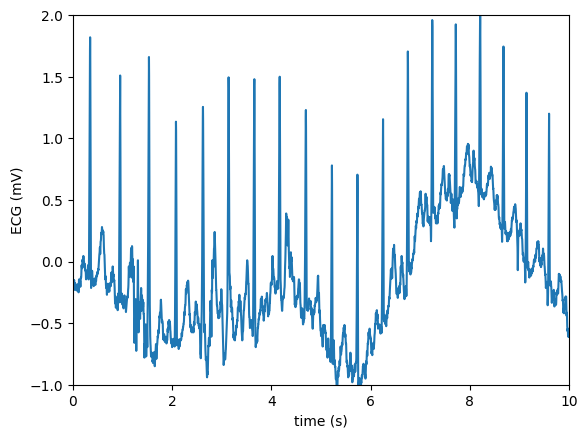

In [4]:
#@title TO DO: represent the first 10 seconds of the signal
t_init = 0
t_end = 10
# num_samples = (t_end - t_init)*fs
time = np.linspace(0, L_seconds, L)
plt.plot(time, ecg)
plt.xlabel("time (s)")
plt.ylabel("ECG (mV)")
plt.xlim(t_init, t_end)
plt.ylim(-1, 2)
plt.show()

##**QUESTION 1.1:** What type of noise/artifacts/error do you see? Describe them (2-3 lines)

**ANSWER:** Your answer goes here.

Baseline wander - this can be seen by the extraneous low-frequency (drift in the ECG's baseline - zero voltage level) and is probably caused by respiration, body movements or improper electrode placement.

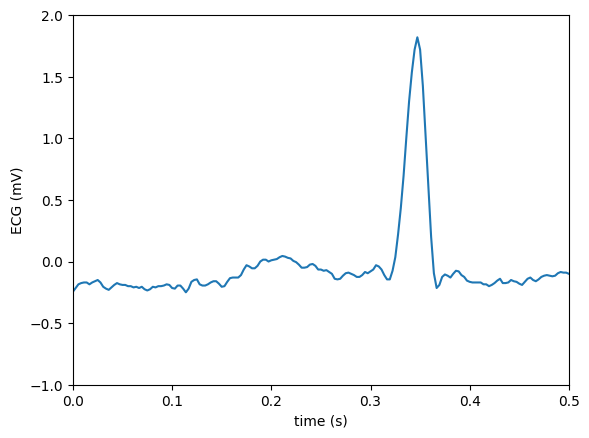

In [5]:
#@title TO DO: Now represent the first 0.5 seconds of the signal
t_init = 0
t_end = 0.5
# num_samples = (t_end - t_init)*fs
time = np.linspace(0, L_seconds, L)
plt.plot(time, ecg)
plt.xlabel("time (s)")
plt.ylabel("ECG (mV)")
plt.xlim(t_init, t_end)
plt.ylim(-1, 2)
plt.show()

##**QUESTION 1.2:** What type of noise/artifacts/error do you see now? Describe them (2-3 lines)

**ANSWER:** These up and down peaks that are observable in the signal are probably given by powerline interferance. It can cause problems interpreting low-amplitude waveforms and
spurious waveforms can be introduced

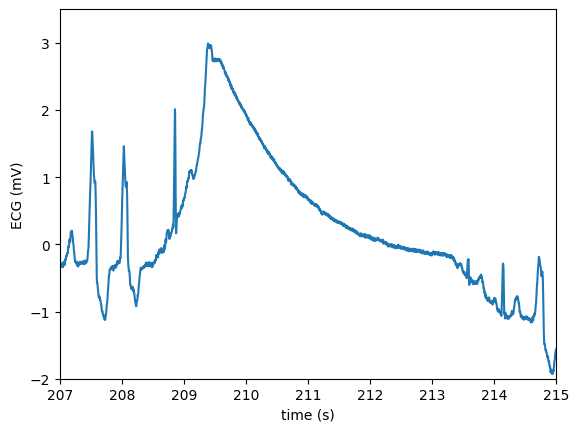

In [6]:
#@title TO DO: Now represent the signal between 207 and 215 seconds
t_init = 207
t_end = 215
time = np.linspace(0, L_seconds, L)
plt.plot(time, ecg)
plt.xlabel("time (s)")
plt.ylabel("ECG (mV)")
plt.xlim(t_init, t_end)
plt.ylim(-2, 3.5)
plt.show()

## **QUESTION 1.3:** What type of noise/artifacts/error do you see now? Describe them (2-3 lines)

**ANSWER:** Something touched the elctrode here. It's an artifact. Maybe high pass filter can minimize this effect


# 02 - Remove signal noise
There are multiple techniques employed for noise reduction in ECG, which include:

*   **Median filter:** This method entails substituting each data point with the median value of neighboring data points, thereby eliminating any anomalies or interference.

*   **Wavelet filter:** Utilizing wavelet analysis, this filter segregates the ECG signal into distinct frequency components, enabling the selective removal of particular frequency ranges containing noise.

*   **Adaptive filter:** Employing a dynamic algorithm tailored to the unique characteristics of the ECG signal, this filter achieves effective noise reduction while preserving the signal's integrity.

*   **Butterworth filter:** Employing a low-pass filter, this technique eliminates high-frequency noise from the ECG signal.

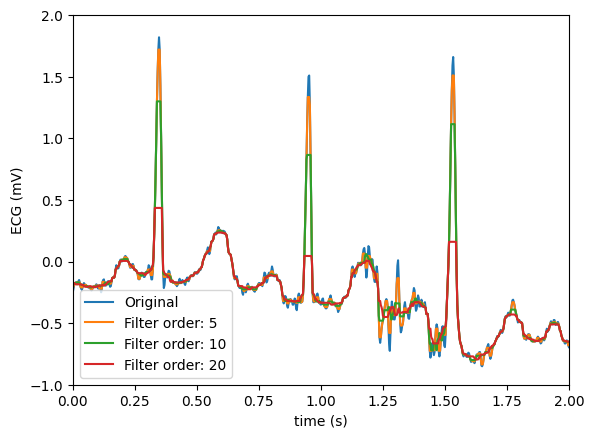

In [7]:
# TO DO: Implement a median filter and apply it to different filter orders [5, 10, 20]. Represent the ECG signals
# Median filter is a good way to remove the noise seen in signals above
# window size - how many samples I get
# median filter will get median of the points I get
# sliding window - just slide to the next point and calculate again

import numpy as np
def median_filter(data, window_size):

    filtered_data = np.zeros(len(data))

    for i in range(len(data)):
        start = max(0, i - window_size // 2)
        end = min(len(data), i + window_size // 2 + 1) #check limits
        filtered_data[i] = np.median(data[start:end])

    return filtered_data

ecg_filtered_signal_5 = median_filter(ecg,5)
ecg_filtered_signal_10 = median_filter(ecg,10)
ecg_filtered_signal_20 = median_filter(ecg,20)


# Plot original and filtered signals
import matplotlib.pyplot as plt
t_init = 0
t_end = 2
plt.plot(time, ecg, label='Original')
plt.plot(time, ecg_filtered_signal_5, label='Filter order: 5')
plt.plot(time, ecg_filtered_signal_10, label='Filter order: 10')
plt.plot(time, ecg_filtered_signal_20, label='Filter order: 20')
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("ECG (mV)")
plt.xlim(t_init, t_end)
plt.ylim(-1, 2)
plt.show()


## **QUESTION 2.1:** Comment the effect of the different filter orders on the output ECG signals obtained. What filter order would you choose and why? (5 lines max.)

**ANSWER:** Filter order 5 because 20 and 10 remove features of the data like the actual amplitude of the wavez. 5 is the one that reduces noise but keeps the signal shape


# 03 - Remove baseline wandering

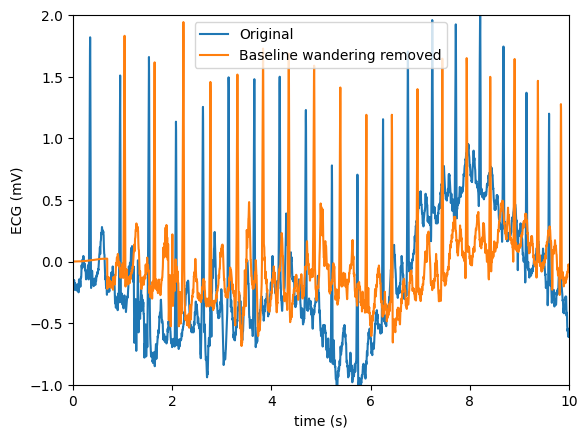

In [17]:
#@title TO DO: Design a FIR linear phase filter (Tip: use signal.firwin() function and odd number of taps). Represent the signal.

# How to normalize cutoff frequencies - need to divide but the NyQuist frequency (fs/2)

from scipy import signal

num_taps = 501

fc= 0.5# Hertz firwin accepets hertz

taps = signal.firwin(num_taps, fc, fs=fs, pass_zero = False)

ecg_baseline_removed = signal.lfilter(taps, 1, ecg)

# Plot original and filtered signals
import matplotlib.pyplot as plt
t_init = 0
t_end = 10
plt.plot(time, ecg, label='Original')
plt.plot(time, ecg_baseline_removed, label='Baseline wandering removed')
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("ECG (mV)")
plt.xlim(t_init, t_end)
plt.ylim(-1, 2)
plt.show()


## **QUESTION 3.1:** Comment the effect of the different filter settings (numtaps, cutoff frequency,...) on the output ECG signals obtained. What filter setup would you choose and why? (5 lines max.)

**ANSWER:** If the cutoff frequency is too high we lose signal shape and attributes, if the number of taps is too low the signal doesn't deviate from the current wandering. There is also the problem of the time delay introduced when the number of taps is too high. For a good solution I used fc = 0.5 and num_taps = 501

# 04 - Notch filter

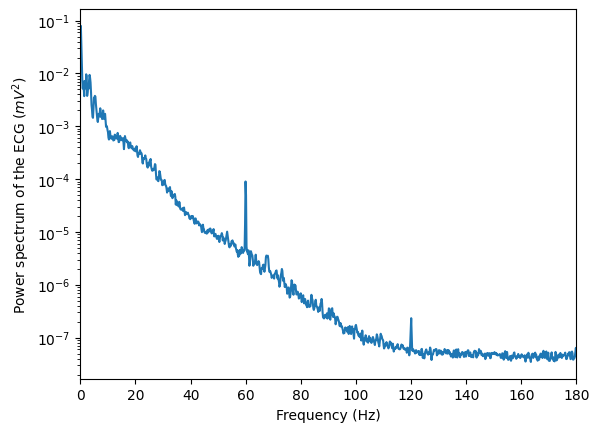

In [18]:
#@title TO DO: Visualize the FFT of the ECG
from scipy.signal import welch

f, Pxx = welch(ecg, fs=fs, nperseg =2048, scaling = 'spectrum')

plt.semilogy(f, Pxx)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power spectrum of the ECG $(mV^2)$")
plt.xlim(f[[0, -1]])
plt.show()

Need to apply notch filter at 60 Hz

## **QUESTION 4.1:** What is the power line noise frequency for this ECG?
**ANSWER:** Your answer goes here.

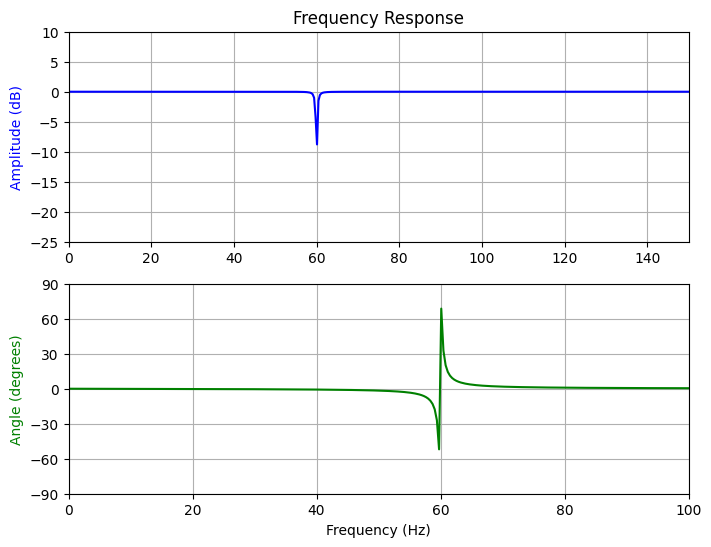

In [41]:
#@title TO DO: Design a Notch filter and plot its frequency response (Tip: use the signal.iirnotch(f0, Q, fs) function)
from scipy import signal
f0 = 60  # Frequency to be removed from signal (Hz) if I put fs this one is in hertz if not is normalized
Q = 100# Quality factor lower quality means more attenuation, more signal consumed and not just the correct frequency
# Design notch filter
b, a = signal.iirnotch(f0, Q, fs)
b_harmonic1, a_harmonic1 = signal.iirnotch(f0*2, Q, fs)

# Frequency response
freq, h = signal.freqz(b, a, fs=fs)

# Plot
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([0, 150])
ax[0].set_ylim([-25, 10])
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 100])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid(True)
plt.show()



## **QUESTION 4.2:** What is the filter/frequency response effect if you modify the Quality factor? Try different values and discuss (5 lines max.)

**ANSWER:** The quality factor determines the bandwidth of the notch filter. A higher Q factor results in a narrower bandwidth, meaning the filter removes only a very narrow range of frequencies, making it more selective. A lower Q factor widens the bandwidth, causing the filter to remove a broader range of frequencies, which can lead to excessive filtering and potential loss of important signal components.

In [42]:
#@title TO DO: Apply the Notch filter to the ecg signal
from scipy import signal
ecg_notch = signal.filtfilt(b, a, ecg) #filtfit used to apply a digital filter forward and backward to a signal.

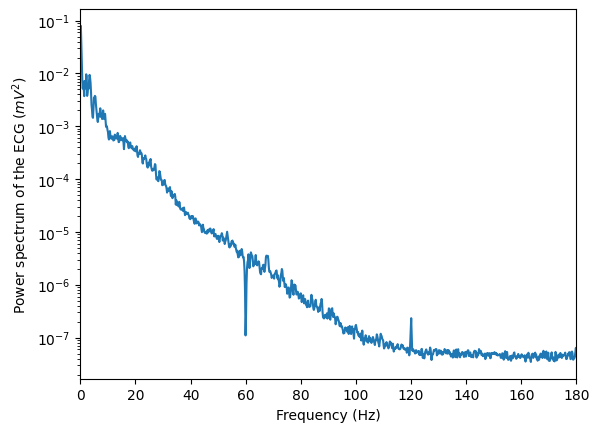

In [43]:
#@title TO DO: Visualize the filtered signal and its FFT to confirm the power line noise cancellation

f, Pxx = welch(ecg_notch, fs=fs, nperseg =2048, scaling = 'spectrum')
plt.semilogy(f, Pxx)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power spectrum of the ECG $(mV^2)$")
plt.xlim(f[[0, -1]])
plt.show()

## **QUESTION 4.3:**

1.   Describe the filtered power spectrum of the ECG
2.   Were all the peaks removed?
3.   Was the ecg_notch filtered signal modified too much

**ANSWER:**

1. The filtered power spectrum now has the amplitude in the 60Hz frequency extremely reduced.
2. Not all peaks were removed, because I only selected 60Hz, but this is a preiodic noise that appears from 60 to 60 Hz so I could just apply the same filter to the other 60x frequencies.
3. The notch at 60hz is narrow which means the noise of the power line interference was removed. The overall shape of the psectrum is preserved and there are no large distortions, so I would say that the signal wasn't deeply modified.
